# <font color="blue">TITANIC

<img src='https://www.selectabase.co.uk/wp-content/uploads/2021/05/featured-image1_2-1.jpg'>

**<font color="blue">Goal**
It is your job to predict if a passenger survived the sinking of the Titanic or not.
For each in the test set, you must predict a 0 or 1 value for the variable.

**<font color="blue">Metric**
Your score is the percentage of passengers you correctly predict. This is known as accuracy.

**<font color="blue">Submission File Format**
You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.
The file should have exactly 2 columns:

PassengerId (sorted in any order)
Survived (contains your binary predictions: 1 for survived, 0 for deceased)


### <font color='blue'> Titanic Dataset Column Descriptions

1. **<font color='blue'>PassengerId**: A unique identifier assigned to each passenger.

2. **<font color='blue'>Survived**: Indicates whether the passenger survived.
   - `1` = Survived
   - `0` = Did not survive
   - In the provided sample, these values are set to `None`, meaning they might be missing.

3. **<font color='blue'>Pclass**: The passenger's class on the ship, representing socioeconomic status.
   - `1` = First Class
   - `2` = Second Class
   - `3` = Third Class

4. **<font color='blue'>Name**: The full name of the passenger, including any titles such as "Mr.", "Mrs.", or "Dona" (a Spanish honorific title).

5. **<font color='blue'>Sex**: The gender of the passenger, with values such as "male" or "female".

6. **<font color='blue'>Age**: The age of the passenger. Some values may be `NaN`, meaning the age information is missing.

7. **<font color='blue'>SibSp**: The number of siblings or spouses the passenger had aboard the Titanic.
   - "Sib" stands for siblings (brothers, sisters, stepbrothers, stepsisters).
   - "Sp" stands for spouses (husbands or wives).

8. **<font color='blue'>Parch**: The number of parents or children the passenger had aboard the Titanic.
   - "Par" stands for parents (mother or father).
   - "Ch" stands for children (daughter, son, stepdaughter, stepson).

9. **<font color='blue'>Ticket**: The ticket number of the passenger, which can include letters and numbers.

10. **<font color='blue'>Fare**: The fare paid for the ticket in British Pounds.

11. **<font color='blue'>Cabin**: The cabin number assigned to the passenger. Some values may be `NaN`, indicating missing information.

12. **<font color='blue'>Embarked**: The port where the passenger boarded the Titanic.
    - `C` = Cherbourg
    - `Q` = Queenstown
    - `S` = Southampton

Each column provides important data for analyzing survival patterns, socioeconomic impacts, and demographic trends among Titanic passengers.


## <font color="blue"> Requirements

In [3]:
import pandas as pd
pd.set_option('display.max_columns',100)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

## <font color="blue"> Import Data

In [5]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [6]:
train_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
train_data.shape

(891, 12)

In [8]:
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [9]:
test_data.shape

(418, 11)

In [10]:
# combine test and train data
test_data['Survived'] = None

# Concatenate train and test data along rows
df=pd.concat([train_data,test_data],ignore_index=True)
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,None,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,None,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,None,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,None,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,None,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## <font color="blue">EDA (Explaratory Data Analysis)

In [12]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,None,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,None,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,None,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,None,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,None,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [13]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
513,514,1,1,"Rothschild, Mrs. Martin (Elizabeth L. Barrett)",female,54.0,1,0,PC 17603,59.400,NaN,C
529,530,0,2,"Hocking, Mr. Richard George",male,23.0,2,1,29104,11.500,NaN,S
579,580,1,3,"Jussila, Mr. Eiriik",male,32.0,0,0,STON/O 2. 3101286,7.925,NaN,S


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    object 
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(6)
memory usage: 122.8+ KB


In [15]:
df.isnull().sum() # we have null data on Survived, Age and Cabin columns

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


In [17]:
df.corr(numeric_only=True)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.038354,0.028814,-0.055224,0.008942,0.031428
Pclass,-0.038354,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,-0.558629,0.178740,0.160238,0.221539,1.000000


In [18]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
df["Pclass"].value_counts()

Pclass
3    709
1    323
2    277
Name: count, dtype: int64

In [20]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [21]:
df["Sex"].value_counts()

Sex
male      843
female    466
Name: count, dtype: int64

## <font color="blue">Data Visualization

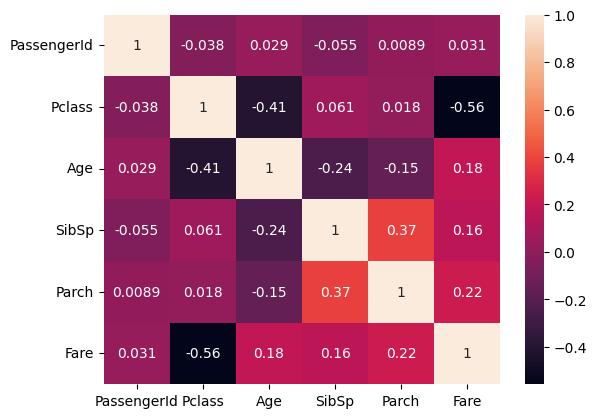

In [23]:
sns.heatmap(df.corr(numeric_only=True),annot=True);

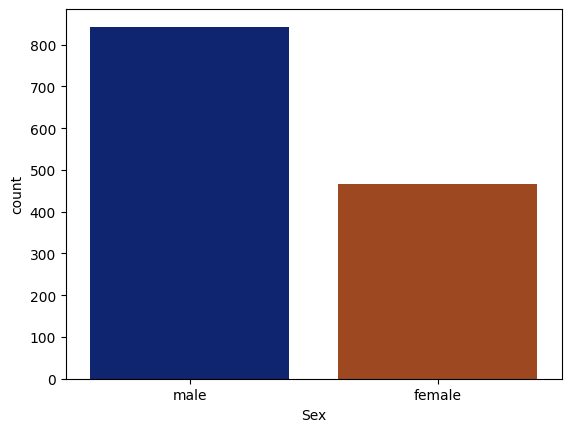

In [24]:
sns.countplot(x=df["Sex"],palette="dark");

<Axes: xlabel='Age'>

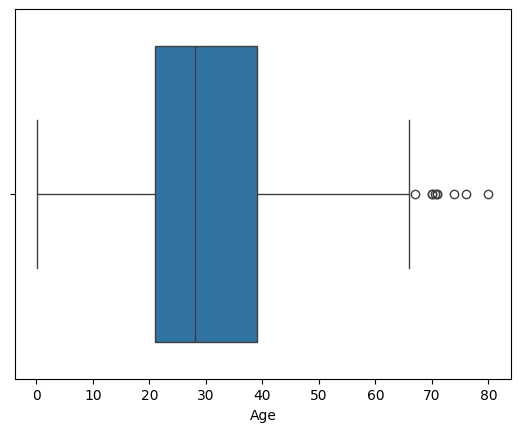

In [25]:
sns.boxplot(x=df["Age"])

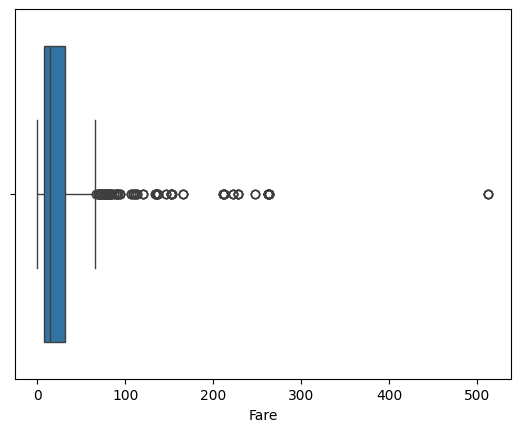

In [26]:
sns.boxplot(x=df["Fare"]);

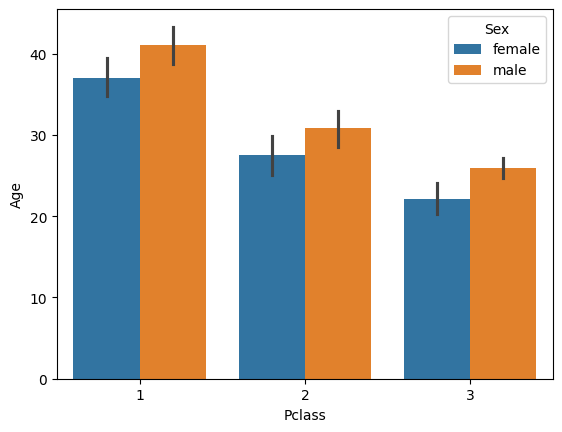

In [27]:
sns.barplot(x ='Pclass', y = 'Age', hue = 'Sex', data = df);

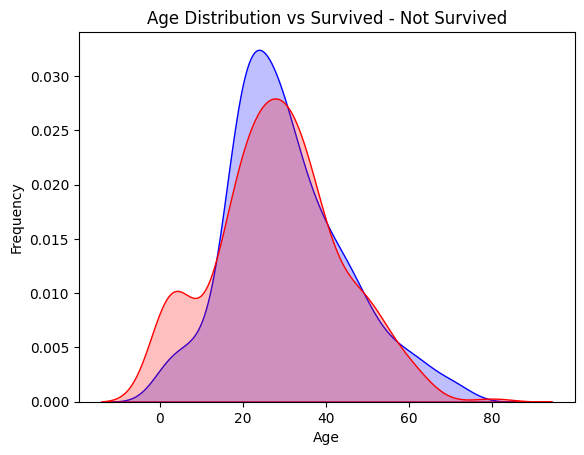

In [28]:
sns.kdeplot(df[df["Survived"]==0]["Age"],fill=True,color="blue")
sns.kdeplot(df[df["Survived"]==1]["Age"],fill=True,color="red")
plt.title("Age Distribution vs Survived - Not Survived")
plt.xlabel("Age")
plt.ylabel("Frequency");

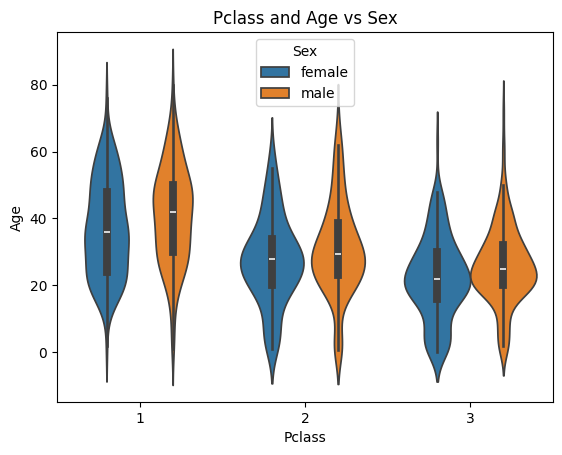

In [29]:
sns.violinplot(x="Pclass",y="Age",hue="Sex",data=df)
plt.title("Pclass and Age vs Sex");

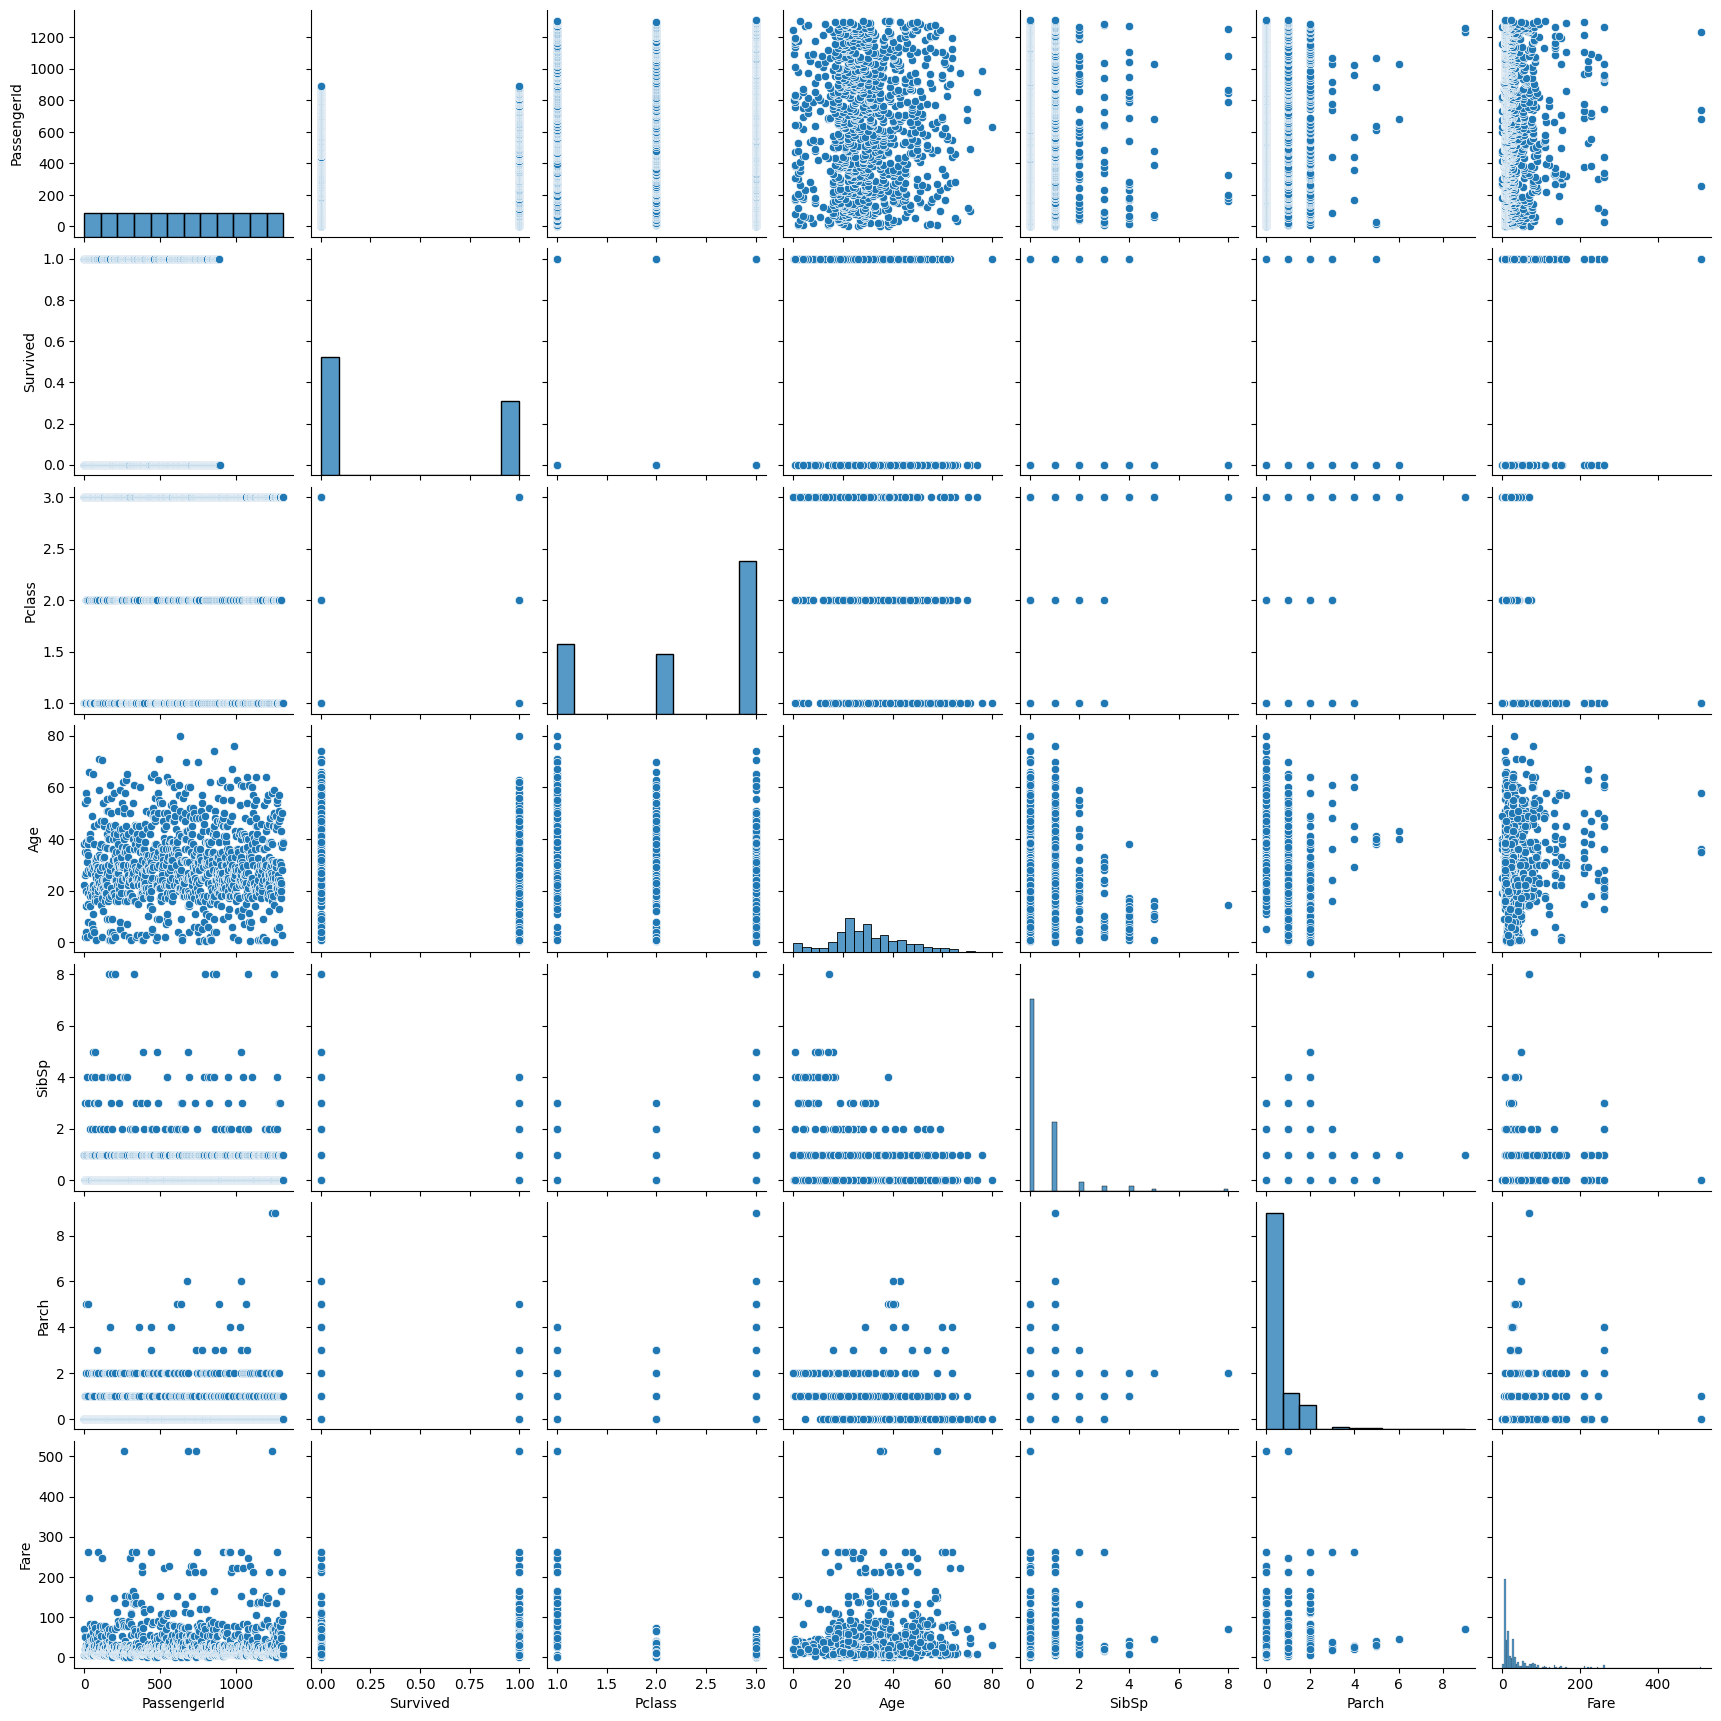

In [30]:
sns.pairplot(df);

## <font color="blue"> Feature Engineering

In [32]:
df["Title"]=df["Name"].str.extract(' ([A-Za-z]+)\\.',expand=False)
df['Title']=df['Title'].replace(['Ms','Mlle'],'Miss')
df['Title']=df['Title'].replace(['Mme','Countess','Lady','Dona'],'Mrs')
df['Title']=df['Title'].replace(['Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer'],'Mr')

df["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

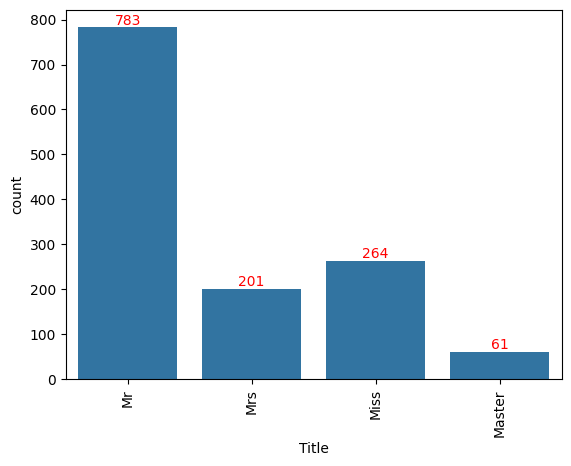

In [33]:
ax=sns.countplot(x="Title",data=df)
ax.bar_label(ax.containers[0],color="red")
plt.xticks(rotation=90);

In [34]:
# Filling missing values
df['Age'].fillna(df.groupby('Title')['Age'].transform('mean'),inplace=True)
df['Fare'].fillna(df['Fare'].mean(),inplace=True)
df['Embarked'].fillna('S',inplace=True)


In [35]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Title             0
dtype: int64

In [36]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = np.where(df['FamilySize'] > 1, 0, 1)

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,1


## <font color="blue"> Modelling

In [134]:
x=df.drop(['Survived','PassengerId','Name','Cabin','Ticket'],axis=1)
y = df[["Survived"]]

In [136]:
x=pd.get_dummies(x,drop_first=True)
x.tail()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
1304,3,32.811056,0,0,8.0500,1,1,True,False,True,False,True,False
1305,1,39.000000,0,0,108.9000,1,1,False,False,False,False,False,True
1306,3,38.500000,0,0,7.2500,1,1,True,False,True,False,True,False
1307,3,32.811056,0,0,8.0500,1,1,True,False,True,False,True,False
1308,3,5.482642,1,1,22.3583,3,0,True,False,False,False,False,False


In [160]:
x_train=x[:891]
x_test=x[891:]
y_train=y[:891].astype(float)
y_test=y[891:]
y_train.dtypes

Survived    float64
dtype: object

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


#lightboost da eklenebilir
def classification_test(x,y,confusion_mtr=False,classification_rpt=False):
    # Butun Modelleri tanimliyorum
    g=GaussianNB()
    b=BernoulliNB()
    l=LogisticRegression()
    d=DecisionTreeClassifier()
    rf=RandomForestClassifier()
    h=GradientBoostingClassifier()
    k=KNeighborsClassifier()
    
    algos=[g,b,l,d,rf,h,k]
    algo_names=['Gaussian NB','Bernoulli NB','Logistic Regression','Decision Tree Classifier','Random Forest Classifier','Gradient Boosting Classifier','KNeighbors Classifier']

    accuracy=[]
    confusion=[]
    classification=[]
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    # Hata ve dogruluk oranlarini bir tablo haline getirmek icin bir dataframe olusturuyorum
    result=pd.DataFrame(columns=['Accuracy Score','Confusion Matrix','Classification Report'],index=algo_names)

    for algo in algos:
        p=algo.fit(x_train,y_train).predict(x_test)
        accuracy.append(accuracy_score(y_test,p))
        confusion.append(confusion_matrix(y_test,p)**0.5)
        classification.append(classification_report(y_test,p))

    # result adli tabloya dogruluk ve hata oranlarini yerlestiriyorum
    result['Accuracy Score']=accuracy
    result['Confusion Matrix']=confusion
    result['Classification Report']=classification

    # olusturdugun result tablosunu dogruluk oranina (r2_score) gore siralayip donuyor
    r_table=result.sort_values('Accuracy Score',ascending=False)
    
    if confusion_mtr:
        for index, row in r_table.iterrows():
                confusion_mat = np.array(row['Confusion Matrix'])
                print(f"Confusion Matrix of {index}")
                plt.figure(figsize=(3,2))
                sns.heatmap(confusion_mat,annot=True)
                plt.show()
    if classification_rpt:
        for index, row in r_table.iterrows():
                print(f"Classification Report of {index}:")
                print(row['Classification Report'])

        
    return r_table[['Accuracy Score']]
    

In [166]:
classification_test(x_train,y_train)

GaussianNB()
BernoulliNB()
LogisticRegression()
DecisionTreeClassifier()
RandomForestClassifier()
GradientBoostingClassifier()
KNeighborsClassifier()


,Accuracy Score
Random Forest Classifier,0.832402
Decision Tree Classifier,0.821229
Gradient Boosting Classifier,0.821229
Logistic Regression,0.810056
Gaussian NB,0.782123
Bernoulli NB,0.782123
KNeighbors Classifier,0.731844


GaussianNB()
BernoulliNB()
LogisticRegression()
DecisionTreeClassifier()
RandomForestClassifier()
GradientBoostingClassifier()
KNeighborsClassifier()
Confusion Matrix of Random Forest Classifier


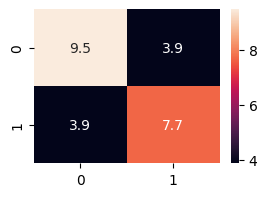

Confusion Matrix of Gradient Boosting Classifier


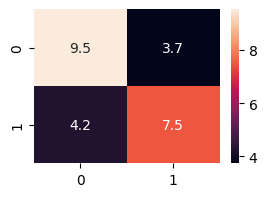

Confusion Matrix of Logistic Regression


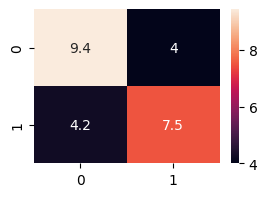

Confusion Matrix of Decision Tree Classifier


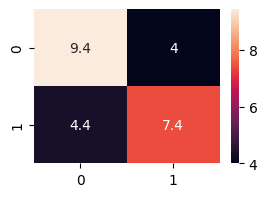

Confusion Matrix of Gaussian NB


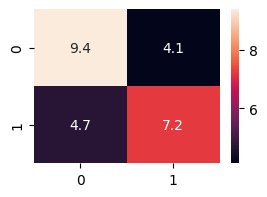

Confusion Matrix of Bernoulli NB


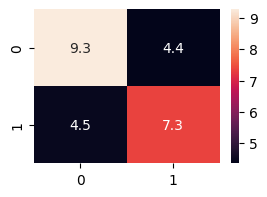

Confusion Matrix of KNeighbors Classifier


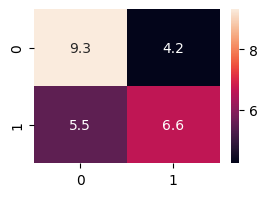

Classification Report of Random Forest Classifier:
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86       105
         1.0       0.80      0.80      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179

Classification Report of Gradient Boosting Classifier:
              precision    recall  f1-score   support

         0.0       0.83      0.87      0.85       105
         1.0       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Classification Report of Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       105
         1.0       0.78      0.76      0.77        74

    accuracy                  

,Accuracy Score
Random Forest Classifier,0.832402
Gradient Boosting Classifier,0.821229
Logistic Regression,0.810056
Decision Tree Classifier,0.804469
Gaussian NB,0.782123
Bernoulli NB,0.782123
KNeighbors Classifier,0.731844


In [168]:
classification_test(x_train,y_train,confusion_mtr=True,classification_rpt=True)

In [170]:
l=LogisticRegression()
model=l.fit(x_train,y_train)
predictions=model.predict(x_test)
predictions

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [191]:
submission = pd.DataFrame({
    'PassengerId': df[891:]['PassengerId'],  
    'Survived': predictions.astype(int)       
})
submission

,PassengerId,Survived
891,892,0
892,893,1
893,894,0
894,895,0
895,896,1
...,...,...
1304,1305,0
1305,1306,1
1306,1307,0
1307,1308,0


In [195]:
submission.to_csv('submission.csv', index=False)